## 用于chatbot的组件

In [1]:
import streamlit as st
import numpy as np

message = st.chat_message("assistant")
message.write("Hello human")
message.bar_chart(np.random.randn(30, 3))

2023-12-07 20:44:42.043 
  command:

    streamlit run /Users/ke/anaconda3/envs/pytorch_base/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

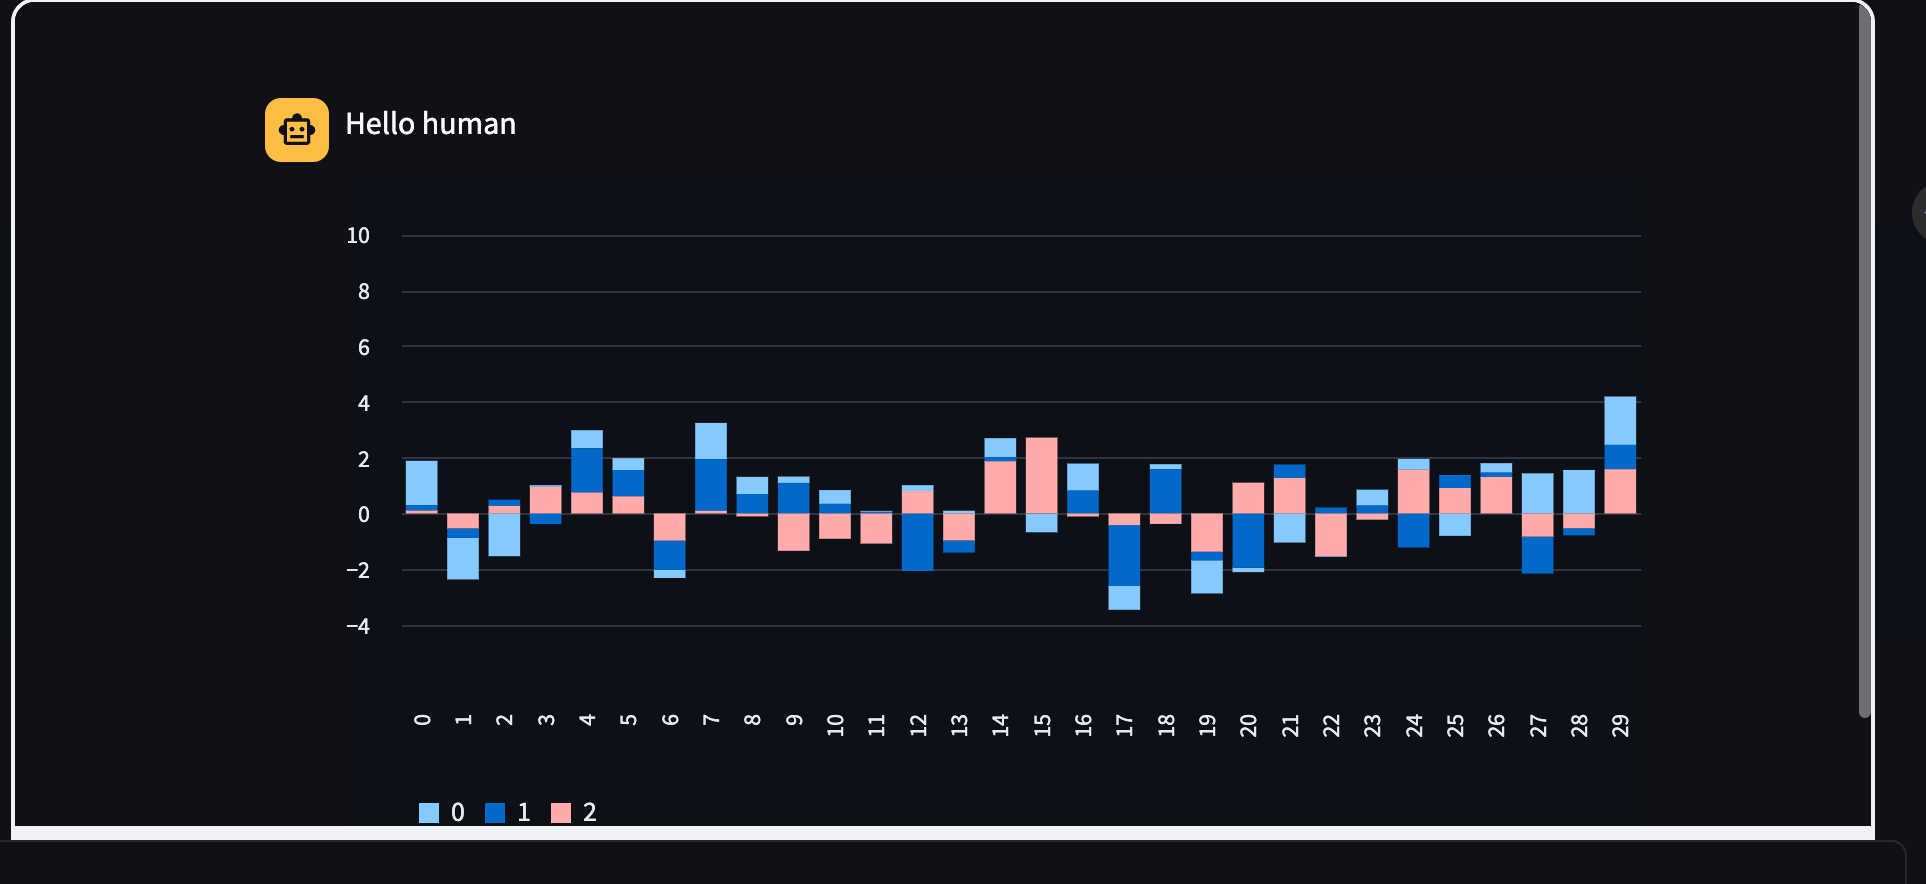

In [ ]:
import streamlit as st
import numpy as np
import time
from submodule.arxiv_links import *
from submodule.openai_api import *
from submodule.my_utils import *
from typing import Dict, List, Literal, Optional, Union
import os
import yaml
import sys
import logging
import zipfile
import rarfile
from pathlib import Path
import requests
import json
from submodule.my_utils import init_logging, handle_errors
import io
import pandas as pd
from datetime import datetime


def get_pdf_list(uploaded_files: List):
    def process_single_file(uploaded_file):
        if uploaded_file.name.endswith(".zip"):
            logging.info(f"get zip file{uploaded_file.name}")
            file_bytes = io.BytesIO(uploaded_file.getvalue())
            with zipfile.ZipFile(file_bytes, 'r') as zip_ref:
                file_names = zip_ref.namelist()
                file_content = [zip_ref.read(name) for name in file_names]
            return file_content, file_names

        ## not recommend to use ra, dur to unrar error
        elif uploaded_file.name.endswith(".rar"):
            logging.error("rar file not support")
            # file_bytes = io.BytesIO(uploaded_file.getvalue())
            # with rarfile.RarFile(file_bytes, 'r') as rar_ref:
            #     file_names = rar_ref.namelist()
            #     file_content = [rar_ref.read(name) for name in file_names]
            # return file_content, file_names

        elif uploaded_file.name.endswith(".pdf"):
            logging.info(f"get pdf file{uploaded_file.name}")

            file_content = [uploaded_file.getvalue()]
            file_names = [uploaded_file.name]
            return file_content, file_names
        else:
            logging.error("File type not supported.")
            sys.exit(1)

    pdf_list, file_names = [], []
    for uploaded_file in uploaded_files:
        tmp_pdf_list, tmp_file_names = process_single_file(uploaded_file=uploaded_file)
        print("tmp_file_names", tmp_file_names)
        pdf_list.extend(tmp_pdf_list)
        file_names.extend(tmp_file_names)

    return pdf_list, file_names


def trigger(text, i, new_text):
    st.session_state.text[i] = new_text + text
    st.write(st.session_state.text[i])
    #


# num_links = st.slider('Number of links', 0, 10, 2)
# if not "text" in st.session_state:
#     st.session_state.text = ["" for i in range(num_links)]
#     for i in range(num_links):
#         text = f"article {i}"
#         text += """
#         abstract: asdasdasd
#         authors: asdasdasd
#         content: asdasdasd
#         """
#
#         st.session_state.text[i] = text
# epts = []
# for i in range(num_links):
#     ept = st.empty()
#     message = ept.chat_message("")
#     text = message.text_area("result", value=st.session_state.text[i], key=f"text{i}")
#     message.text_area("result", value=st.session_state.text[i][::-1], key=f"text{i}2")
#     # print("text",text)
#     # st.button("regenerate", key=f"regenerate{i}", on_click=trigger, args=(text,i,"new_text"))
#     # y = st.selectbox("select",options=["None","generate","voice"],key=f"select{i}")
#     # if  y != "None":
#     #     trigger(text,i,y)
#     epts.append(ept)
#
# if st.button("submit"):
#     for ept in epts:
#         ept.empty()


# print("st.session_state.text",st.session_state.text)
containers = []
for i in range(3):
    container = st.container()
    message = container.chat_message("user input")
    message.markdown("## article title: graph neural network")
    col1, col2 = message.columns(2)
    col1.text("authors: xxx,xxx")
    col2.text("affiliations: xxx,xxx")
    text = message.text_area("content", value="text:dsjidojo", key=f"text:{i}")
    message_answer = container.chat_message("assistant")
    message_answer.text_area("answer", value="answer:123", key=f"answer:{i}")
    containers.append([message, message_answer])

if st.button("submit"):
    containers[0][0].text("new text")




## streamlit total

In [ ]:
import streamlit as st
import time
from submodule.arxiv_links import *
from submodule.openai_api import *
from submodule.my_utils import *
from typing import Dict, List, Literal, Optional, Union
import os
import yaml
import sys
import logging
import zipfile
import rarfile
from pathlib import Path
import requests
import json
from submodule.my_utils import init_logging,handle_errors
import io
import pandas as pd
from datetime import datetime
from playsound import playsound
import random







@st.cache_data
def init_logger():
    logger = init_logging('logging.ini')
    return logger


@st.cache_data
def filter_links(links):
    selected_index = [index for index, selected in links if selected]
    return selected_index



@st.cache_data
def init_config(set_none:bool = False):
    yaml_path = './config.yaml'
    if os.path.exists(yaml_path):
        with open(yaml_path, 'r') as config_file:
            config = yaml.safe_load(config_file)
    else:
        logging.error(f'Config file not found at {yaml_path}')
        sys.exit(1)
    openai_info = config["openai"]
    with open(openai_info['prompts_path'], 'r') as f:
        prompts = json.load(f)
    arxiv_info = config['arxiv']
    nougat_info = config["nougat"]
    proxy = arxiv_info['proxy']
    headers = arxiv_info['headers']
    base_url = openai_info['base_url']
    if set_none:
        proxy = headers = None
    return openai_info, arxiv_info, nougat_info,prompts, proxy, headers,base_url

def get_links(keyword, proxy,max_num=10,line_length=15,searchtype='all',show_abstract='show',
              order='-announced_date_first',size=50,show_meta_data=True,daily_type = 'cs',headers = None):
    links ,titles,abstract,authors = [],[],[],[]
    for i in range(max_num):
        links.append(f"link{i+1}:https://arxiv.org/abs/2109.07841")
        titles.append(f"title{i+1}:Quantum Computing with Photons")
        abstract.append(f"abstract{i+1}:some abstract")
        authors.append(f"authors{i+1}:some authors")
    return links,titles,abstract,authors



def get_model_predcit(_proxy = None,_headers = None,pdf_name:str=None,**kwargs):
    text = kwargs.get("pdf", '')[0] + f"this article is about saying {kwargs.get('pdf','')[0]}"
    return [text],[pdf_name]

def text2speech(place_holder,text,filename:str=None):

        flag, json_info = text_to_speech(text,return_type='bytes')
        place_holder.audio(json_info, format='audio/mp3')
        place_holder.download_button(label="下载音频", data=json_info,
                            file_name=f"{str(filename)}.mp3", key=f"download_{str(filename)}")
        # play_sound = col1.button("播放音频", key=f"play_{str(filename)}_{str(millis)}")
        # if play_sound:
        #     file_dir = "./speech_output/"
        #     if not os.path.exists(file_dir):
        #         os.makedirs(file_dir)
        #     filePath = file_dir + str(millis) + ".mp3"
        #     with open(filePath, 'wb') as fo:
        #         fo.write(json_info)
        #     playsound(filePath)




class Args:
    def __init__(self,nougat_info,arxiv_info, **kwargs):
        self.checkpoint = kwargs.get("checkpoint", Path(nougat_info["check_point"]))
        self.out = kwargs.get("out", Path(nougat_info["out"]))
        self.recompute = kwargs.get("recompute", True)
        self.markdown = kwargs.get("markdown", True)
        self.pdf = kwargs.get("pdf", [Path(i) for i in nougat_info["pdf"]])
        self.num_process = kwargs.get("num_process", 3)
        self.kw = kwargs.get("kw", arxiv_info['key_word'])
        self.rate_limit = 3 if var_openai_info['rate_limit'] else None


@st.cache_data
def get_summary(
                openai_info:dict,
                proxy:dict,
                article:str,
                file_name:str,
                num_iterations:int=3,
                requests_per_minute:Union[int,None] = None,
                summary_prompts: dict = None,
                resummry_prompts: dict = None,
                ignore_titles: list = None,
                base_url: str = "https://openai.huatuogpt.cn/v1",
                acquire_mode:Literal['url','openai'] = 'url',
                prompt_factor:float = 0.8,  # prompt tokens / total tokens
                num_processes:int = 3,
                init_grid:int = 2,
                split_mode:str = 'group',
                gpt_config:Union[Dict,None] = None):
    # gpt_config example:
                    # {
                    #     "model": "gpt-3.5-turbo-16k-0613",
                    #     "temperature": 0.9,
                    #     "max_tokens": 16385,
                    #     "top_p": 1,
                    #     "frequency_penalty": 0,
                    #     "presence_penalty": 0,
                    # }
    title = file_name.split(".")[0] if file_name else "some title"
    authors = "xxxx,xxxx"
    affiliations = "xxxx,xxxx"
    total_resp = article
    re_respnse = ["re_summary :\n" +article,"score: -xxx : 9"]
    return title,authors,affiliations,total_resp,re_respnse


def get_enhance_answer(place_holder,
                   raw_summary:str,
                   regenerate_summary:str,
                   usage:Literal['None','blog','speech','regenerate'] = 'None',
                   num_iterations:int = 3,
                   summary_box_height:int = 600):
    assert usage in ['None','blog','speech','regenerate'],f"usage must be in ['None','blog','speech','regenerate'],but got {usage}"
    if usage == 'None':
        text =  regenerate_summary
    elif usage == 'blog':
        text = "blog summary:\n" + regenerate_summary
    elif usage == 'speech':
        text =  "speech summary:\n" + regenerate_summary

    elif usage == 'regenerate':
        text = "regenerate summary:\n" + regenerate_summary
    else:
        text =  regenerate_summary

    place_holder.text_area("Regenerate Summary:", f"{text.strip()}", height=summary_box_height,
                             key=f"regenerate_summary_{i}")
    if usage == 'speech':
        text2speech(place_holder=place_holder,text=text,filename=raw_summary)
    return text.strip()



def save_file(save_texts,
              file_names,
              save_dirs,
              summary_sve_dir='summary_mmd',re_summary_sve_dir='re_summary_mmd'):
    return save_mmd_file(save_texts=save_texts,file_names=file_names,save_dirs=save_dirs)



@st.cache_data
def load_file(uploaded_file):
    return  get_pdf_list(uploaded_file)


def display_result(answer_message,
                   re_respnse,
                   summary_box_height,
                   pdf_name):
    pdf_name = pdf_name.split(".")[0] if pdf_name else "some title"
    re_respnse, score = re_respnse
    temp_time = datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
    random_num = random.randint(0,100000)
    answer_message.text_area("Summary:", f"{re_respnse.strip()}", height=summary_box_height,key=f"summary_{pdf_name}_{temp_time}_{random_num}")
    answer_message.text_area("Score:", f"{score}", height=summary_box_height,key=f"score_{pdf_name}_{temp_time}_{random_num}")
    answer_message.caption(f"not enough? click the button to regenerate summary")
    # user_option = answer_message.selectbox("regenerate summary",['None','regenerate','blog','speech'],key=f"option_{pdf_name}_{temp_time}_{random_num}")
    # if user_option != 'None':
    #     regenerate_summary = get_enhance_answer(raw_summary=re_respnse,
    #                                             regenerate_summary=re_respnse,
    #                                             usage=user_option,
    #                                             num_iterations=num_iterations,
    #                                             summary_box_height=summary_box_height)
    #     answer_message.text_area("Regenerate Summary:", f"{regenerate_summary.strip()}", height=summary_box_height,key=f"regenerate_summary_{pdf_name}_{temp_time}_{random_num}")




def display_download_button(summaries,re_respnse,score,pdf_name):
    col1,col2,col3 = st.columns(3)
    col1.download_button(label="下载详细摘要为mmd格式", data=summaries.encode('utf-8'),
                          file_name=f"{str(pdf_name)}_summary.mmd", key=f"download_{str(pdf_name)}_summary")
    col2.download_button(label="下载摘要博客为mmd格式", data=re_respnse.encode('utf-8'),
                            file_name=f"{str(pdf_name)}_re_summary.mmd", key=f"download_{str(pdf_name)}_re_summary")
    col3.download_button(label="下载打分结果为mmd格式", data=str(score).encode('utf-8'),
                            file_name=f"{str(pdf_name)}_score.mmd", key=f"download_{str(pdf_name)}_score")






if __name__ == "__main__":
    # Streamlit应用程序标题
    st.set_page_config(page_title="模型演示应用程序", page_icon=":smiley:", layout="wide", initial_sidebar_state="auto")
    var_openai_info, var_arxiv_info, var_nougat_info,var_prompts, var_proxy,var_headers,var_base_url = init_config(set_none= True)
    var_req_url = st.text_input('request url:',"http://61.241.103.32:5010",key="request_url",help="request url of server,default: http://61.241.103.32:5010,if local,http://127.0.0.1:8000")
    #http://127.0.0.1:8000
    logger = init_logger()
    var_ignore_titles = var_openai_info['ignore_title']
    args = Args(nougat_info=var_nougat_info,arxiv_info=var_arxiv_info)
    # left is place where user operate
    # right is place where prompt and result show
    # left, right = st.columns(2)
    ##--------------------------------------sidebar--------------------------------------##
    # Add a selectbox to the sidebar:
    add_selectbox = st.sidebar.selectbox(
        'How would you like to be contacted?',
        ('Email', 'Home phone', 'Mobile phone')
    )

    if add_selectbox == 'Email':
        user_email = st.sidebar.text_input("Your email", key="email")
    elif add_selectbox == 'Home phone':
        user_phone = st.sidebar.text_input("Your phone", key="phone")
    else:
        user_mobile = st.sidebar.text_input("Your mobile phone", key="mobile")


    # 显示模型超参数
    var_linelength = st.sidebar.slider("line length",10,40,18)
    summary_box_height = st.sidebar.slider("summary box height",100,1000,600,step=50,help=" height of summary box")
    st.sidebar.header("openai info")
    var_max_links = st.sidebar.slider("max links", 0, 25, 5,help="max links of arxiv search result")
    var_api_key = st.sidebar.text_input("openai api key", key="api_key",help="your openai api key, e.g. sk-xxxxxx")
    # var_openai_info['api_key'] = var_api_key if var_api_key else var_openai_info['api_key']
    var_summary_prompt = None
    var_resummary_prompt = None
    with st.sidebar.expander("prompts optional"):
        var_summary_prompt = st.file_uploader("summary prompt", type=["json"], key="summary_prompt",help = "summary prompt json file,e.g.{'system':'','general_summary':''}")
        var_resummary_prompt = st.file_uploader("resummary prompt", type=["json"], key="resummary_prompt",help = "resummary prompt json file,e.g.{'system':'','overview':''}")
        var_summary_prompt = json.loads(var_summary_prompt.read()) if var_summary_prompt else None
        var_prompts['section summary'] = var_summary_prompt if var_summary_prompt else var_prompts['section summary']
        var_resummary_prompt = json.loads(var_resummary_prompt.read()) if var_resummary_prompt else None
        var_prompts["blog summary"] = var_resummary_prompt if var_resummary_prompt else var_prompts["blog summary"]


    with st.sidebar.expander("Model config Options"):
        num_iterations = st.slider("num iterations", 1, 10, 3,help="num iterations of generating summary")
        var_max_token = st.slider("max token", 0, 16385, 16000,help="max token of total tokens(including prompt tokens) of gpt-3.5 model")
        var_temperature = st.slider("temperature", 0.0, 2.0, 0.5,help="temperature of gpt-3.5 model")
        var_top_p = st.slider("top p", 0.0, 1.0, 1.0,help="top p of gpt-3.5 model")
        var_frequency_penalty = st.slider("frequency penalty", -2.0, 2.0, 0.1, help="frequency penalty of gpt-3.5 model")
        var_presence_penalty = st.slider("presence penalty", -2.0, 2.0, 0.2, help="presence penalty of gpt-3.5 model")

    st.header("使用nougat进行arxiv论文摘要demo")
    st.subheader("选择文件输入方式：")
    mode = st.selectbox("选择模式:", ["关键词搜索url", "上传文件"])


    #--------------------------------------main--------------------------------------
    var_save_dir = st.text_input('保存路径','./app_res', key="save_dir",help="save dir of result")
    if mode == "关键词搜索url":
        st.subheader("选择搜索关键词排序方式：")
        var_daily_type = st.selectbox(
            'daily type',
            ('cs', 'math', 'physics', 'q-bio', 'q-fin', 'stat', 'eess', 'econ', 'astro-ph', 'cond-mat', 'gr-qc',
             'hep-ex', 'hep-lat', 'hep-ph', 'hep-th', 'math-ph', 'nucl-ex', 'nucl-th', 'quant-ph')
        ,help="daily type of arxiv search, when keyword is None, this option will be used")
        col1, col2, col3, col4 = st.columns(4)
        var_show_abstracts = col1.selectbox("显示摘要", ['是', '否'], key="show_abstracts",help="show abstract of arxiv search result")
        var_searchtype = col2.selectbox("选择搜索类型:", ['all', 'title', 'abstract', 'author', 'comment',
                                                'journal_ref', 'subject_class', 'report_num', 'id_list'],
                                        key="searchtype",help="search type of arxiv search")
        var_order = col3.selectbox("选择排序方式:", ['-announced_date_first',
                                           'submitted_date',
                                           '-submitted_date', 'announced_date_first', ''],
                                      key="order",help="order of arxiv search result")
        var_size = col4.selectbox("选择返回结果数量:", [25, 50, 100, 200], key="size",help="size of arxiv search result")
        st.subheader("输入关键词搜索arxiv论文：")

        var_keyword = st.text_input("输入关键字:", "None", key="keyword",help="keyword of arxiv search, e.g. 'quantum computer'")
        # if st.session_state.get("restart",None) is None:
        #     st.session_state["restart"] = True
        #
        if st.session_state.get("run_model",None) is None:
            st.session_state["run_model"] = False

        # result_placeholder: use to show hint
        result_placeholder = st.empty()
        if var_keyword.lower() == "none":
            var_keyword = None
            result_placeholder.text("没有关键词输入，自动推荐当天新投递论文")
        else:
            result_placeholder.text(f"搜索{var_keyword}中，请等待...")
        var_links,var_titles,var_abstract,var_authors = get_links(var_keyword,
                                                                  var_proxy,
                                                                  max_num=var_max_links,
                                                                  line_length=var_linelength,
                                                                  searchtype=var_searchtype,
                                                                  order=var_order,
                                                                  size=var_size,
                                                                  daily_type=var_daily_type,
                                                                  headers=var_headers)

        if var_links is None:
            result_placeholder.text(f"搜索失败,错误信息：{var_authors},请重试")
            st.stop()

        var_options = [(i,False) for i in range(len(var_links))]

        if var_keyword == "None":
            result_placeholder.text(f"获取到当天新投递的{var_max_links}篇论文(您可以选择多个链接)：")
        else:
            result_placeholder.text(f"搜索{var_keyword}成功，获取{var_max_links}篇相关内容，链接如下(您可以选择多个链接)：")

        # choice_list: store checkbox and abstract text,if not selected,abstract text will be hidden
        choice_list = []
        for i,link in enumerate(var_links):
            selected = st.checkbox(f"{var_titles[i]}", key=f"link{i + 1}",value=False)
            var_options[i] = (i,selected)
            abs_text = st.empty()
            abs_text.markdown(f"{var_authors[i]}<br><br>{var_abstract[i]}",unsafe_allow_html=True)
            choice_list.append([selected,abs_text])

        selected_record = st.empty()
        var_num_selected = len([i for i,selected in var_options if selected])
        selected_record.text(f"您选择了{var_num_selected}个链接")
        # 运行模型按钮
        # if "button_clicked" not in st.session_state:
        #     st.session_state.button_clicked = False
        run_button = st.button("运行模型", key="run_model_url",help="run model to generate summary")
        if "run_model" not in st.session_state:
            st.session_state["run_model"] = False
        st.text(f"st.session:{st.session_state}")
        st.markdown("---")
        st.text("您选择了以下链接：")
        var_selected_links = filter_links(var_options)
        logger.info(f"selected links:{var_selected_links}")
        var_variables = {key: value for key, value in globals().items() if key.startswith("var_") and not callable(value)}

        if "var_variables" not in st.session_state:
            st.session_state["var_variables"] = var_variables
            st.session_state["run_model"] = False
        elif st.session_state["var_variables"] != var_variables:
            # print("not eq")
            # key_difference = set(st.session_state["var_variables"].keys()) - set(var_variables.keys())
            # value_diff = {key for key in st.session_state["var_variables"].keys() if st.session_state["var_variables"][key] != var_variables[key] }
            # print("key_difference:",key_difference,"value_diff:",value_diff)
            st.session_state["var_variables"] = var_variables
            st.session_state["run_model"] = False
        else:
            st.session_state["run_model"] = True

        if "generated_summary" not in st.session_state:
            st.session_state["generated_summary"] = [None] * 25

        # var_num_selected = len(var_selected_links)
        regenrate_options = []
        if  run_button or st.session_state["run_model"] :
            if var_num_selected == 0:
                st.error("您没有选择任何链接，请选择链接后再运行模型")
            progress_text = '正在运行模型...'
            progress_bar = st.progress(0,text=progress_text)
            if st.session_state["run_model"]:
                choice_list = [[x[0],x[1].empty()] for x in choice_list if not x[0]]
            for i,index in enumerate(var_selected_links):
                args.pdf = [var_links[index]]
                user_input = st.chat_message("user")
                user_input.caption(f"input pdf :")
                user_input.markdown(f"{var_titles[index]}")
                now_time = time.time()
                args_dict = vars(args)
                model_result,pdf_name = get_model_predcit(_proxy=var_proxy,_headers=var_headers,**args_dict)
                # md_path = './res/raw_mmd/2309_07841.mmd'
                # with open(md_path, 'r', encoding='utf-8') as f:
                #     text = f.read()
                # model_result,pdf_name = [text],['2309_07841']
                if model_result is None:
                    st.error(f"模型运行失败，失败信息：{pdf_name}，请重试")
                    st.stop()
                else:
                    model_result, pdf_name = model_result[0], pdf_name[0]
                    logger.info(f"model predict result:{pdf_name}")
                    parser_titles,parser_authors,parser_affiliations,summaries,re_respnse = get_summary(
                                                                                                        openai_info = var_openai_info,
                                                                                                        proxy=var_proxy,
                                                                                                        article=model_result,
                                                                                                        file_name= pdf_name,
                                                                                                        requests_per_minute= args.rate_limit,
                                                                                                        ignore_titles=var_ignore_titles,
                                                                                                        summary_prompts = var_prompts['section summary'],
                                                                                                        resummry_prompts = var_prompts["blog summary"],
                                                                                                        base_url=var_base_url,
                                                                                                        gpt_config={
                                                                                                            "max_tokens": var_max_token,
                                                                                                            "temperature": var_temperature,
                                                                                                            "top_p": var_top_p,
                                                                                                            "frequency_penalty": var_frequency_penalty,
                                                                                                            "presence_penalty": var_presence_penalty,
                                                                                                        },
                                                                                                        num_iterations=num_iterations
                                                                                                        )
                    if parser_titles is None:
                        st.error(f"摘要生成失败，失败信息：{re_respnse}，请重试")
                        st.stop()
                    # 显示模型运行时间和结果
                    # summaries = "1111111111"
                    parser_authors = "Authors:<br>" + parser_authors if parser_authors else var_authors[index]
                    parser_affiliations = parser_affiliations if parser_affiliations else ''
                    logging.info(f"parser_authors:{repr(parser_authors)},||{var_authors[index]},\n parser_affiliations:{parser_affiliations}\n")
                    # st.markdown(f"{parser_authors}",unsafe_allow_html=True)
                    # st.text_area("Author:",f"{parser_authors.strip()}",height=10)
                    answer_message = st.chat_message("assistant")
                    answer_message.caption(f"parser result:")
                    if parser_affiliations:
                        left_author,right_affiliation = answer_message.columns(2)
                        left_author.markdown(f"{parser_authors}",unsafe_allow_html=True)
                        right_affiliation.markdown(f"Affiliations:<br>{parser_affiliations}",unsafe_allow_html=True)

                    else:
                        answer_message.markdown(f"{parser_authors}",unsafe_allow_html=True)
                    # re_respnse,score = re_respnse
                    # st.text_area("Summary:",f"{re_respnse.strip()}",height=summary_box_height)
                    # st.text_area("Score:",f"{score}",height=summary_box_height)
                    # file_paths = save_file(save_texts=[summaries, re_respnse], file_names=[pdf_name, pdf_name],
                    #                            save_dirs=[str(args.out) + "raw_mmd", str(args.out) + "re_summary_mmd"])
                    #
                    # logger.info(f"Save abstract to {file_paths[0]},re_summary to {file_paths[1]}")
                    #
                    # pdf_name = pdf_name.split(".")[0]
                    # st.download_button(label="下载摘要为mmd格式",data=summaries.encode('utf-8'),file_name=f"{str(pdf_name)}_summary.mmd",key=f"download_{str(index)}_summary")
                    # st.download_button(label="下载摘要博客为mmd格式",data=re_respnse.encode('utf-8'),file_name=f"{str(pdf_name)}_re_summary.mmd",key=f"download_{str(index)}_re_summary")
                    # st.download_button(label="下载打分结果为mmd格式",data=str(score).encode('utf-8'),file_name=f"{str(pdf_name)}_score.mmd",key=f"download_{str(index)}_score")
                    display_result(answer_message,
                                   re_respnse,
                                   summary_box_height,
                                   pdf_name)
                    user_options = answer_message.selectbox("regenerate summary",['None','regenerate','blog','speech'],key=f"option_{i}")
                    print("run_button:",run_button,"st.run_model:",st.session_state["run_model"])
                    if run_button:
                        st.session_state["generated_summary"][i] = re_respnse[0]

                    print(f"summaries:{summaries}\n,st.session_state['generated_summary']:\n",st.session_state["generated_summary"])
                    if user_options != 'None':
                        regenerate_summary = get_enhance_answer(place_holder=answer_message,
                                                                raw_summary=summaries,
                                                                regenerate_summary=st.session_state["generated_summary"][i],
                                                                usage=user_options,
                                                                num_iterations=num_iterations,
                                                                summary_box_height=summary_box_height)
                        print(f"regenerate_summary{i}:{regenerate_summary}")
                        st.session_state["generated_summary"][i] = regenerate_summary
                    dur = int(time.time() - now_time)
                    st.write(f"模型运行时间：{dur}")


                    progress_bar.progress((i+1)/var_num_selected,text=progress_text)
                    st.divider()


    else:
        uploaded_file = st.file_uploader(label='上传本地pdf文件(pdf/zip)', accept_multiple_files=True,
                                            type=['pdf', 'zip'], key="upload_file",help="upload pdf/zip file")
        logger.info(f"uploaded_file:{uploaded_file},len:{len(uploaded_file)}")
        tmpdir = var_save_dir
        if uploaded_file is not None:
            pdf_content_list, var_file_names = load_file(uploaded_file)
            # remove duplicate pdf
            pdf_info_df = pd.DataFrame({"pdf_name": var_file_names, "pdf_content": pdf_content_list})
            pdf_info_df = pdf_info_df.drop_duplicates(subset=["pdf_name"])
            pdf_content_list, var_file_names = pdf_info_df["pdf_content"].tolist(), pdf_info_df["pdf_name"].tolist()
            dupulicate_pdf = len(uploaded_file) - len(pdf_content_list)
            if dupulicate_pdf > 0:
                st.text(f"检测到{dupulicate_pdf}个重复pdf文件，已自动删除")
            if len(var_file_names) == 0 or any([pdf is None for pdf in var_file_names]):
                st.error(r"请上传pdf/zip文件")

            button = st.button("确定", key="upload_run_model",help="run model to generate summary")
            var_variables = {key: value for key, value in globals().items() if
                             key.startswith("var_") and not callable(value)}

            if st.session_state.get("run_model", None) is None:
                st.session_state["run_model"] = False
            if "var_pdf_variables" not in st.session_state:
                st.session_state["var_pdf_variables"] = var_variables
                st.session_state["run_model"] = False
            elif st.session_state["var_pdf_variables"] != var_variables:
                print("not eq")
                key_difference = set(st.session_state["var_pdf_variables"].keys()) - set(var_variables.keys())
                value_diff = {key for key in st.session_state["var_pdf_variables"].keys() if
                              st.session_state["var_pdf_variables"][key] != var_variables[key]}
                print("key_difference:", key_difference, "value_diff:", value_diff)
                st.session_state["var_pdf_variables"] = var_variables
                st.session_state["run_model"] = False
            else:
                st.session_state["run_model"] = True
            st.text(f"run_model:{st.session_state['run_model']}")

            if button or st.session_state["run_model"]:
                num_selected = len(var_file_names)
                st.write(f"您上传了{num_selected}个pdf文件,")
                st.write(f"获取到的pdf:\n{var_file_names}")
                progress_text = '正在运行模型...'
                logger.info(f"pdf_list:{var_file_names}")
                process_bar = st.progress(0, text=progress_text)
                for i, pdf, name in zip(range(num_selected), pdf_content_list, var_file_names):
                    args.pdf = [pdf]
                    now_time = time.time()
                    args_dict = vars(args)
                    model_result, pdf_name = get_model_predcit(_proxy=var_proxy, _headers=var_headers, pdf_name=name, **args_dict)
                    model_result, pdf_name = model_result[0], pdf_name[0]
                    titles, authors, affiliations, summaries, re_respnses = get_summary(openai_info=var_openai_info,
                                                                                       proxy=var_proxy,
                                                                                       article=model_result,
                                                                                       file_name=pdf_name,
                                                                                       requests_per_minute=args.rate_limit,
                                                                                       ignore_titles=var_ignore_titles,
                                                                                       summary_prompts=var_prompts[
                                                                                           'section summary'],
                                                                                       resummry_prompts=var_prompts[
                                                                                           "blog summary"],
                                                                                       base_url=var_base_url,
                                                                                       gpt_config=
                                                                                       {
                                                                                         "max_tokens": var_max_token,
                                                                                         "temperature": var_temperature,
                                                                                         "top_p": var_top_p,
                                                                                         "frequency_penalty": var_frequency_penalty,
                                                                                         "presence_penalty": var_presence_penalty,
                                                                                       },
                                                                                       num_iterations=num_iterations
                                                                                       )
                    if titles is not None:
                        if affiliations:
                            col1, col2 = st.columns(2)
                            col1.text_area(f"Auhors:", f"{authors.strip()}", height=10)
                            col2.text_area(f"Affiliations:", f"{affiliations.strip()}", height=10)
                        st.text_area("Author:",f"{authors.strip()}",height=10)

                    else:
                        st.write("due to the parser error, the title is None")


                    # st.text_area("Summary:",f"{re_respnse.strip()}",height=summary_box_height)
                    # st.text_area("Score:",f"{score}",height=summary_box_height)
                    #
                    # file_paths = save_file(save_texts=[summaries, re_respnse], file_names=[pdf_name, pdf_name],
                    #                            save_dirs=[str(args.out) + "raw_mmd", str(args.out) + "re_summary_mmd"])
                    # logger.info(f"Save abstract to {file_paths[0]},re_summary to {file_paths[1]}")
                    #
                    # pdf_name = pdf_name.split(".")[0]
                    # st.download_button(label="下载详细摘要为mmd格式", data=summaries.encode('utf-8'),
                    #                    file_name=f"{str(pdf_name)}_summary.mmd", key=f"download_{str(pdf)}_summary")
                    # st.download_button(label="下载摘要博客为mmd格式", data=re_respnse.encode('utf-8'),
                    #                    file_name=f"{str(pdf_name)}_re_summary.mmd", key=f"download_{str(pdf)}_re_summary")
                    # st.download_button(label="下载打分结果为mmd格式", data=str(score).encode('utf-8'),
                    #                    file_name=f"{str(pdf_name)}_score.mmd", key=f"download_{str(pdf)}_score")
                    display_result(re_respnses,summary_box_height,pdf_name,num_iterations=num_iterations)

                    dur = int(time.time() - now_time)
                    st.write(f"模型运行时间：{dur}")
                    process_bar.progress((i + 1) / num_selected, text=progress_text)
                    st.markdown("---")

        else:
            st.error("无法获取文件，请上传文件")


In [6]:
import os
import fitz

# 提取每一页的图片对象单独保存
def muExtractImages(pdf_name, pic_save_path):
    doc = fitz.open(pdf_name)
    for itm,page in enumerate(doc):
        try:
            tupleImage = page.get_images()
            for xref0 in tupleImage:  # 取第一个元组
                xref = xref0[0]  # 最终取得xref  ok
                img = doc.extract_image(xref)  # 获取文件扩展名，图片内容 等信息
                imageFilename = os.path.join(pic_save_path, str(itm) + '_' + str(xref) + '.' + img['ext'])
                imgout = open(imageFilename, 'wb')  # byte方式新建图片
                imgout.write(img["image"])  # 当前提取的图片写入磁盘
                imgout.close()
        except:
            continue
    doc.close()


# 将每一页作为图片，保存到某个目录
def pdf_image(pdf_name, pic_save_path):
    img_paths = []
    doc = fitz.open(pdf_name)
    for i, pg in enumerate(doc.pages()):
        page = pg  # 获得每一页的对象
        trans = fitz.Matrix(3.0, 3.0)
        pm = page.get_pixmap(matrix=trans, alpha=False)  # 获得每一页的流对象
        img_path = str(i + 1) + '.jpg'
        img_path = os.path.join(pic_save_path, img_path)
        pm.save(img_path)
        img_paths.append(img_path)
    doc.close()
    return img_paths


if __name__ == '__main__':
    file_path ="./data/111.pdf"  # pdf_name 文件路径
    dir_path = "./data"
    muExtractImages(file_path, dir_path)


